# Practical Statistics

## Density Plots and Estimates

A histogram is a visual representation of a frequency table, with the data count on the y-axis and the bins on the x-axis. It displays the amount of occurrences of certain values. In Chapter 4, we have learned how to make a histogram with pandas and plotnine.

A density plot is similar to a histogram in that it representts the distribution of data values as a continuous line. 

A density plot can be thought of as a smoothed histogram, which is normally produced directly from the data using a **kernel density estimate (KDE)**. 


Both histograms and KDEs are supported by the majority of major data science libraries. For example, in pandas, we can use `df.hist` to plot a histogram of data for a given DataFrame. `df.plot.density()`, on the other hand, returns a KDE plot with Gaussian kernels.

Recall that the histogram in the 1967 income distribution values of the Gapminder dataset revealed a dichotomy (two groups). In the following example, a density estimate is superimposed on a histogram of the income distribution with the following Python commands. 

In [1]:
import numpy as np
import pandas as pd
from plotnine import *
from scipy.stats import *

from IPython.display import IFrame, YouTubeVideo, SVG, HTML

# Add this line so you can plot your charts into your Jupyter Notebook.
%matplotlib inline 

ModuleNotFoundError: No module named 'plotnine'

In [2]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

In [3]:
gapminder = pd.read_csv('/Users/Kaemyuijang/SCMA248/Data/gapminder_full.csv')

#url = 'https://raw.githubusercontent.com/STLinde/Anvendt-Statistik/main/gapminder_full.csv'
#gapminder = pd.read_csv(url)
#gapminder['year'].unique()

past_year = 1967

gapminder1967 = gapminder.pipe(lambda x: x.assign(dollars_per_day = x.gdp_cap/365)).query('year == @past_year').dropna()

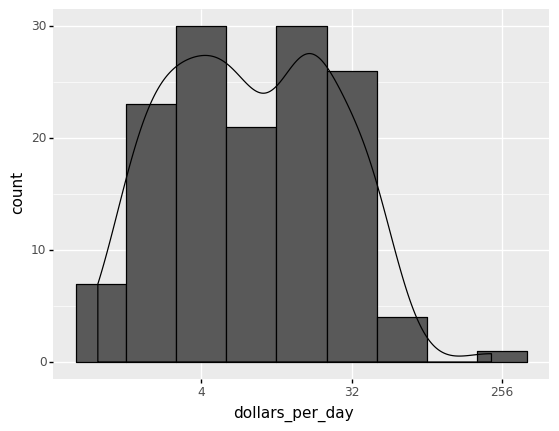

<ggplot: (310164697)>

In [4]:
# see https://plotnine.readthedocs.io/en/stable/generated/plotnine.stats.stat_density.html#plotnine.stats.stat_density
# plotnine.mapping.after_stat evaluates mapping after statistic has been calculated

(
    ggplot(gapminder1967) + 
    aes('dollars_per_day') +
    geom_histogram(aes(y=after_stat('count')), binwidth = 1, color = 'black') +
    geom_density(aes(y=after_stat('count'))) +
    scale_x_continuous(trans = 'log2')
)

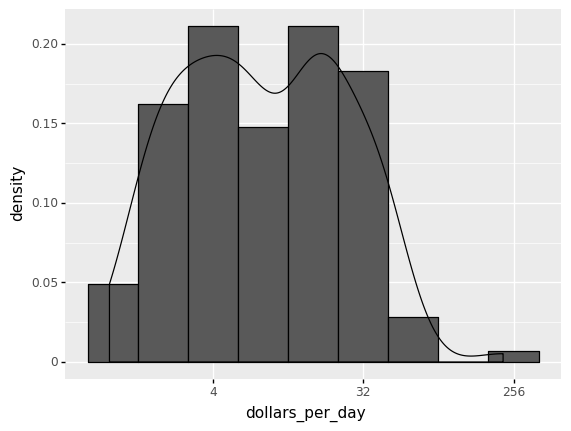

<ggplot: (278383825)>

In [5]:
# see https://plotnine.readthedocs.io/en/stable/generated/plotnine.stats.stat_density.html#plotnine.stats.stat_density
# plotnine.mapping.after_stat evaluates mapping after statistic has been calculated

(
    ggplot(gapminder1967) + 
    aes('dollars_per_day') +
    geom_histogram(aes(y=after_stat('density')), binwidth = 1, color = 'black') +
    geom_density(aes(y=after_stat('density'))) +
    scale_x_continuous(trans = 'log2')
)

The scale of the y-axis of the KDE differs from the histogram presented in Figures above. A density plot corresponds to plotting the histogram as a **proportion** rather than counts (you indicate this with the `aes(y=after_stat('density')` parameter). You calculate areas under the curve between any two points on the x-axis, which correspond to the proportion of the distribution residing between those two locations, instead of counting in bins.

**Exercise** use `plot.hist` and `plot.density` to  display a density estimate of income distribution superposed on a histogram.

In [6]:
# gapminder1967['dollars_per_day'].plot.hist(density=True)

## Correlation

In many modeling initiatives (whether in data science or research), exploratory data analysis requires looking for correlations among predictors and between predictors and a target variable. 

**Positively correlated** variables X and Y (each with measured data) are those in which high values of X correspond to high values of Y and low values of X correspond to low values of Y. 

The variables are **negatively correlated** if high values of X correspond to low values of Y and vice versa.

**Correlation Term Glossary**

* **(Pearson's) Correlation coefficient**
This metric, which goes from –1 to +1, quantifies the degree to which numeric variables are associated to one another.

* **Correlation matrix**
The variables are displayed on both rows and columns in this table, and the cell values represent the correlations between the variables.

To get Pearson's correlation coefficient, we multiply deviations from the mean for variable 1 times those for variable 2, and divide by the product of the standard deviations:
Given paired data $${\displaystyle \left\{(x_{1},y_{1}),\ldots ,(x_{n},y_{n})\right\}}{\displaystyle \left\{(x_{1},y_{1}),\ldots ,(x_{n},y_{n})\right\}}$$ consisting of ${\displaystyle n}$ pairs

$${\displaystyle r_{xy}={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{{\sqrt {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}{\sqrt {\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}}}$$

or

$${\displaystyle r_{xy}={\frac {1}{n-1}}\sum _{i=1}^{n}\left({\frac {x_{i}-{\bar {x}}}{s_{x}}}\right)\left({\frac {y_{i}-{\bar {y}}}{s_{y}}}\right)}$$


### The correlation matrix 

The correlation matrix presents the relationship between all of the variable (feature) pairs. It is frequently the initial step in dimensionality reduction because it shows you how many features are tightly connected (and so may be discarded) versus how many are independent. 

For illustration, let us use the Iris Data Set, containing four features of three Iris classes. 
The correlation matrix may be simply computed using the following code:

In [7]:
# Need to transpose the Iris dataset (which is the numpy array) before 
# applying corrcoef

from sklearn import datasets
import numpy as np
iris = datasets.load_iris()


#cov_data = np.corrcoef(iris.data.T)
#import matplotlib.pyplot as plt
#img = plt.matshow(cov_data, cmap=plt.cm.winter)
#plt.colorbar(img, ticks=[-1, 0, 1])
#print(cov_data)

In [8]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df["target"] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Finding Correlation Between Two Variables

The pandas dataframe provides the method called `corr()` to find the correlation between the variables. It calculates the correlation between the two variables.

In [9]:
correlation = df["sepal length (cm)"].corr(df["petal length (cm)"])

correlation 

0.8717537758865831

The correlation between the features sepal length and petal length is around 0.8717. The number is closer to 1, which means these two features are highly correlated.

### Plotting Correlation Matrix

In this section, you’ll plot the correlation matrix by using the background gradient colors. This internally uses the matplotlib library.

First, find the correlation between each variable available in the dataframe using the `corr()` method. The `corr()` method will give a matrix with the correlation values between each variable.

Now, set the background gradient for the correlation data. Then, you’ll see the correlation matrix colored.

In [10]:
corr = df.corr()
corr
# corr.style.background_gradient(cmap='coolwarm')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


### Plotting Correlation HeatMap

We can visualize the correlation matrix in a graphical form using a heatmap from  the Seaborn library.

In what follows, you can add title and axes labels using the `heatmap.set(xlabel=’X Axis label’, ylabel=’Y axis label’, title=’title’)`.

After setting the values, you can use the `plt.show()` method to plot the heat map with the x-axis label, y-axis label, and the title for the heat map.

/Users/Kaemyuijang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.


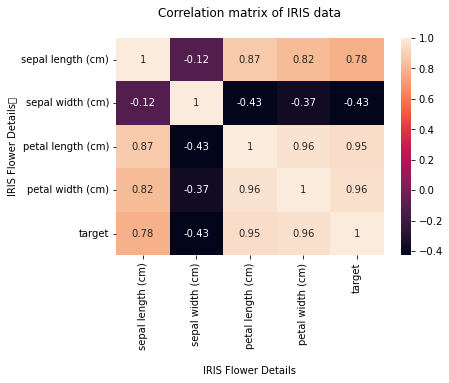

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
hm = sns.heatmap(df.corr(), annot = True)
hm.set(xlabel='\nIRIS Flower Details', ylabel='IRIS Flower Details\t', title = "Correlation matrix of IRIS data\n")
plt.show()

The value of the diagonals is 1 as you can see in the preceding figure. There is also a strong link (high correlation) between the first and third features, the first and fourth features, and the third and fourth features. As a result, we can observe that only the second feature is nearly independent of the others; the rest are associated in some way.

The correlation coefficient, like the mean and standard deviation, is sensitive to outliers in the data. Robust alternatives to the traditional correlation coefficient are available in software packages. The methods in the `sklearn.covariance` scikit-learn module implement a range of approaches. 􏰜See http://scikit-learn.org/stable/modules/covariance.html for more detail.

To use plotnine to create the heatmap, see https://www.r-bloggers.com/2021/06/plotnine-make-great-looking-correlation-plots-in-python/

## Data and Sampling Distributions

When we are working on a problem with a large data set, it is usually not possible or necessary to work with the entire data set unless you want to wait hours for processing transformations and feature engineering to complete.

Drawing a sample from your data that is informative enough to discover important insights is a more effective method that will still allow you to draw accurate conclusions from your results. 

Let us have a look at some fundamental terminology.

The term **"population"** refers to a grouping of items that share some property. The population size is determined by the number of elements in the population.

The term **"sample"** refers to a portion of the population. Sampling is the procedure for picking a sample. The sample size is the number of elements in the sample.

The term **"probability Sampling method"** employs randomization to ensure that every member of the population has an equal probability of being included in the chosen sample. **Random sampling** is another name for it.

The figure below depicts a diagram that explains the principles of data and sampling distributions that we will cover in this chapter.

![Image from oreilly](https://www.oreilly.com/library/view/practical-statistics-for/9781491952955/assets/psds_0201.png)

Image source: https://www.oreilly.com/library/view/practical-statistics-for/9781491952955/assets/psds_0201.png

The population on the left represents a population that is believed to **follow an underlying but unknown distribution in statistics**. Only the sample data and its empirical distribution, as shown on the right, are available. 

**A sampling process** is utilized to move from the left to the right side (represented by an arrow). 

* Traditional statistics emphasized the left side, employing theory based on strong assumptions about the population. 

* Modern statistics has shifted to the righthand side, eliminating the need for such assumptions.

When compared to working with full or complete datasets, sampling offers numerous advantages, including lower costs and faster processing.

To sample data, you must first specify your population and the procedure for selecting (and sometimes rejecting) observations for inclusion in your sample. The population parameters you want to estimate with the sample could very well describe this.

Before obtaining a data sample, think about the following points:

* Sample Goal. The population property (parameters) that you wish to estimate using the sample.

* Population. The range or domain within which observations could be made.

* Selection Criteria.   The procedure for accepting or rejecting observations from your sample.

* Sample Size. The number of observations that will constitute the sample.

### Sampling bias

One of the most common types of biases seen in real-world scenarios is sampling bias. 

Sampling bias arises when some members of a population are systematically more likely to be selected in a sample than others. 

In machine learning, it arises when the data used to train a model does not accurately reflect the distribution of samples that the model would encounter in the production.

### Types of sampling techniques

![Image from questionpro](https://cdn.scribbr.com/wp-content/uploads/2019/09/probability-sampling.png)

Image source: https://cdn.scribbr.com/wp-content/uploads/2019/09/probability-sampling.png

#### Simple random sampling 

The simple random sampling is the simplest straightforward approach to sample data. In essence, the subset is made up of observations that were randomly selected from a bigger set; each observation has the same chance of being chosen from the larger set.

Simple random sampling is simple and straightforward to implement. However, it's still feasible that we'll introduce bias into our sample data. Consider a scenario in which we have a large dataset with unbalanced labels (or categories). We may mistakenly fail to collect enough cases to represent the minority class by using simple random sampling.

**Example** You wish to choose a simple random sample of 100 employees of the company . You assign a number from 1 to 1000 to each employee in the company database, and then choose 100 numbers using a random number generator.

![Image from gcumedia](https://lc.gcumedia.com/hlt362v/the-visual-learner/images/simple-random-sample.png)

Image source: https://lc.gcumedia.com/hlt362v/the-visual-learner/images/simple-random-sample.png

For illustration, we will be using synthetic data which can be prepared in Python as follows:

In [12]:
# create synthetic data
id = np.arange(0, 10).tolist()
height = np.round(np.random.normal(loc=165, scale =15, size=len(id)), 2)

# convert to pandas dataframe
data = {"id":id, "height": height} 
df = pd.DataFrame(data=data)
df

,id,height
0,0,166.34
1,1,126.03
2,2,166.33
3,3,191.29
4,4,147.31
5,5,153.55
6,6,183.67
7,7,154.53
8,8,177.61
9,9,187.80


To perform random sampling, Python pandas includes a method called `sample()`. You can use `random_state` for reproducibility.

In [13]:
# simple sampling example
simple_random_sample = df.sample(n=5, random_state=888) 
simple_random_sample

,id,height
2,2,166.33
0,0,166.34
8,8,177.61
5,5,153.55
4,4,147.31


#### Systematic sampling

Systematic sampling is similar to simple random sampling, but it is usually slightly easier to carry out. Every person in the population is assigned a number, but rather than assigning numbers at random, individuals are chosen at regular intervals. 

When the observations are randomized, systematic sampling usually yields a better sample than simple random sampling. If our data contains periodicity or repeating patterns, however, systematic sampling is not suitable.

**Example** All of the company's employees are listed alphabetically. You choose a starting point at random from the first ten numbers: number 6. Every tenth individual on the list is chosen from number 6 onwards (6, 16, 26, 36, and so on), resulting in a sample of 100 persons.

![Image from gcumedia](https://lc.gcumedia.com/hlt362v/the-visual-learner/images/systematic-sampling.png)

Image source: https://lc.gcumedia.com/hlt362v/the-visual-learner/images/systematic-sampling.png

In [14]:
# interval sampling example
idx = np.arange(0, len(df), step=2) #Return evenly spaced values within a given interval.
interval_sample = df.iloc[idx]
interval_sample

,id,height
0,0,166.34
2,2,166.33
4,4,147.31
6,6,183.67
8,8,177.61


#### Stratified Sampling

Stratified random sampling is a kind of probability sampling in which a research organization divides the total population into many non-overlapping, homogenous groups (strata) and selects final members for research at random from the various strata. Each of these groupings' members should be unique enough that every member of each group has an equal chance of being chosen using basic probability. The number of instances from each stratum to choose from is proportionate to the stratum's size.

Arranging or classifying by  age, socioeconomic divisions, nationality, religion, educational achievements is a common practice. 

**Example:** There are 800 female employees and 200 male employees at the company. You select the population into two strata based on gender to ensure that the sample reflects the company's gender balance. Then you select 80 women and 20 men at random from each group, giving you a representative sample of 100 people.

**Example:** Consider the following scenario: a study team is looking for opinions on investing in Crypto from people of various ages. Instead of polling all Thai nationals, a random sample of roughly 10,000 people could be chosen for research. These ten thousand people can be separated into age groups, such as 18-29, 30-39, 40-49, 50-59, and 60 and up. Each stratum will have its own set of members and numbers.

![Image from gcumedia](https://lc.gcumedia.com/hlt362v/the-visual-learner/images/stratified-sample.png)

Image source: https://lc.gcumedia.com/hlt362v/the-visual-learner/images/stratified-sample.png

Here we will use Scikit-learn for stratified sampling. Note that you will see this in more details later in the chapter on Introduction to Machine Leaning.

In [15]:
# create synthetic data
# id = np.arange(0, 10).tolist()
# height = np.round(np.random.normal(loc=165, scale =15, size=len(id)), 2)

# convert to pandas dataframe
# data = {"id":id, "height": height} 
# df = pd.DataFrame(data=data)
# df

The `StratifiedKFold` module in Scikit-learn sets up `n_splits` (folds, partitions or groups) of the dataset in a way that the folds are made by **preserving the percentage of samples for each class**.

The brief explaination for the code below (also see the diagram below) is as follows:

1. The dataset has been split into K (K = 2 in our example) equal  partitions (or folds).

2. (In iteration 1) use fold 1 as the testing set and the union of the other folds as the training set.

3. Repeat step 2 for K times, using a different fold as the testing set each time. 


![Image from gcumedia](https://www.researchgate.net/profile/Mingchao-Li/publication/331209203/figure/fig2/AS:728070977748994@1550597056956/K-fold-cross-validation-method_W640.jpg)

Image source: https://www.researchgate.net/profile/Mingchao-Li/publication/331209203/figure/fig2/AS:728070977748994@1550597056956/K-fold-cross-validation-method_W640.jpg

This sampling strategy tends to improve the representativeness of the sample by reducing the amount of bias we introduce; in the worst-case scenario, our resulting sample would be no worse than random sampling. Determining the strata, on the other hand, can be a tough operation because it necessitates a thorough understanding of the data's features. It's also the most time-consuming of the approaches discussed.

In [16]:
# create synthetic data
# population size of 20

id = np.arange(0, 20).tolist()
height = np.round(np.random.normal(loc=165, scale =15, size=len(id)), 2)

# convert to pandas dataframe
data = {"id":id, "height": height} 
df = pd.DataFrame(data=data)

In [17]:
from sklearn.model_selection import StratifiedKFold

# dividing the data into groups
df["strata"] = np.repeat([1, 2], len(df)/2).tolist()

# instantiating stratified sampling
stratified = StratifiedKFold(n_splits=2)

for x, y in stratified.split(df, df["strata"]):
    print("TRAIN INDEX:", x, "TEST INDEX:", y)
    stratified_random_sample = df.iloc[x] 

#stratified_random_sample

TRAIN INDEX: [ 5  6  7  8  9 15 16 17 18 19] TEST INDEX: [ 0  1  2  3  4 10 11 12 13 14]
TRAIN INDEX: [ 0  1  2  3  4 10 11 12 13 14] TEST INDEX: [ 5  6  7  8  9 15 16 17 18 19]


By supplying `shufle=True`, each class's samples will be shuffled before splitting into batches. Note also that the samples within each split will not be shuffled. We also use `n_splits=4` in the following code below:

In [18]:
from sklearn.model_selection import StratifiedKFold

# dividing the data into groups
df["strata"] = np.repeat([1, 2], len(df)/2).tolist()

# instantiating stratified sampling
stratified = StratifiedKFold(n_splits=4, shuffle=True, random_state=888)

for x, y in stratified.split(df, df["strata"]):
    print("TRAIN INDEX:", x, "TEST INDEX:", y)
    stratified_random_sample = df.iloc[x] 

#stratified_random_sample

TRAIN INDEX: [ 2  3  4  6  7  8  9 11 12 13 14 15 16 17 18] TEST INDEX: [ 0  1  5 10 19]
TRAIN INDEX: [ 0  1  2  5  6  7  9 10 11 12 13 14 16 17 19] TEST INDEX: [ 3  4  8 15 18]
TRAIN INDEX: [ 0  1  2  3  4  5  6  8 10 11 14 15 17 18 19] TEST INDEX: [ 7  9 12 13 16]
TRAIN INDEX: [ 0  1  3  4  5  7  8  9 10 12 13 15 16 18 19] TEST INDEX: [ 2  6 11 14 17]


The following code can be used to acsess a single batch instead of using `for loop`.

In [19]:
## sklearn Kfold access single fold instead of for loop
## https://stackoverflow.com/questions/27380636/sklearn-kfold-acces-single-fold-instead-of-for-loop

skf = stratified.split(df, df["strata"])
mylist = list(skf)

x,y = mylist[3]

stratified_random_sample_train = df.iloc[x] 
stratified_random_sample_test = df.iloc[y] 

print(stratified_random_sample_train)

    id  height  strata
0    0  160.56       1
1    1  141.48       1
3    3  147.74       1
4    4  186.11       1
5    5  130.88       1
7    7  159.12       1
8    8  172.77       1
9    9  147.52       1
10  10  136.51       2
12  12  183.23       2
13  13  171.81       2
15  15  141.52       2
16  16  162.69       2
18  18  156.08       2
19  19  167.08       2


Alternative to the above approach, we use the `next()` function that returns the next item from the iterator. See https://www.programiz.com/python-programming/methods/built-in/next for more detail.

In [20]:
# https://stackoverflow.com/questions/27380636/sklearn-kfold-acces-single-fold-instead-of-for-loop
# https://stackoverflow.com/questions/2300756/get-the-nth-item-of-a-generator-in-python
# In Python, Itertools is the inbuilt module that allows us to handle the iterators in an efficient way. They make iterating through the iterables like lists and strings very easily. One such itertools function is islice().


#from itertools import islice, count
import itertools


skf = stratified.split(df, df["strata"])

index = 0
x, y = next(itertools.islice(skf,index,None))

stratified_random_sample_train = df.iloc[x] 
stratified_random_sample_test = df.iloc[y] 

print(stratified_random_sample_train)
print(stratified_random_sample_test)

    id  height  strata
2    2  171.95       1
3    3  147.74       1
4    4  186.11       1
6    6  147.88       1
7    7  159.12       1
8    8  172.77       1
9    9  147.52       1
11  11  147.56       2
12  12  183.23       2
13  13  171.81       2
14  14  178.27       2
15  15  141.52       2
16  16  162.69       2
17  17  162.48       2
18  18  156.08       2
    id  height  strata
0    0  160.56       1
1    1  141.48       1
5    5  130.88       1
10  10  136.51       2
19  19  167.08       2


This sampling strategy tends to improve the representativeness of the sample by reducing the amount of bias we introduce; in the worst-case scenario, our resulting sample would be no worse than random sampling. Determining the strata, on the other hand, can be a tough operation because it necessitates a thorough understanding of the data's features. It's also the most time-consuming of the approaches discussed.

**Exercise:** This exercise aims to explain how `StratifiedKFold` can be used for stratified sampling.

1. What is the class ratio for the column "strata", i.e. the proportion of data which are in strata (groups) 1 and 2?

Note that when we create our folds we want each split to have this same percentage of categories (groups).

When we perform the splits we will need to tell the function which column we are going to use as the target, strata in this case. The command will be 
`stratified.split(df, df["strata"])`.

Then we use a for loop and StratifiedKFold’s split operation to get the train and test row indexes for each split.

We can then use these indexes to split our data into train and test dataframes. 

2. What are the indexes used in the train data and test data in the first batch (or split)?

3. Determine the class ratio for each batch (split) from the test set (you may also want to try for the training set).

In [21]:
# create synthetic data
# Population size of 100

id = np.arange(0, 100).tolist()
height = np.round(np.random.normal(loc=165, scale =15, size=len(id)), 2)

# convert to pandas dataframe
data = {"id":id, "height": height} 
df = pd.DataFrame(data=data)

# dividing the data into groups
df["strata"] = np.repeat([1, 2], [0.2*len(df),0.8*len(df)]).tolist()


**Solutions to exercise**

1. What is the class ratio for the column "strata", i.e. the proportion of data which are in strata (groups) 1 and 2?

In [22]:
df.groupby('strata').id.count()

strata
1    20
2    80
Name: id, dtype: int64

Ans: the class ratio of strata 1 to 2 is 1:4.

2. What are the indexes used in the train data and test data in the first batch (or split)?

Ans: skf is actually a **generator**, which does not compute the train-test split until it is needed. This **improves memory usage**, as you are not storing items you do not need. Making a list of the skf object forces it to make all values available.

The following Python commands can be applied to access the indexes of the train data and test data in the first split (or the n-th split). Simply change the value of the `index` variable to access different splits: 

In [23]:
## sklearn Kfold acces single fold instead of for loop
## https://stackoverflow.com/questions/27380636/sklearn-kfold-acces-single-fold-instead-of-for-loop

# instantiating stratified sampling

K = 4
stratified = StratifiedKFold(n_splits=K)

skf = stratified.split(df, df["strata"])
mylist = list(skf)

index = 0
x,y = mylist[index]

stratified_random_sample_train = df.iloc[x] 
stratified_random_sample_test = df.iloc[y] 

print('Training set: \n', stratified_random_sample_train)
print('The class ratio of groups 1 to 2 in this batch of the training set is')
print(stratified_random_sample_train['strata'].value_counts())

print('Test set: \n', stratified_random_sample_test)
print('The class ratio of groups 1 to 2 in this batch of the test set is')
print(stratified_random_sample_test['strata'].value_counts())

Training set: 
     id  height  strata
5    5  168.29       1
6    6  163.27       1
7    7  164.88       1
8    8  163.55       1
9    9  157.62       1
..  ..     ...     ...
95  95  151.83       2
96  96  163.17       2
97  97  155.09       2
98  98  164.62       2
99  99  171.49       2

[75 rows x 3 columns]
The class ratio of groups 1 to 2 in this batch of the training set is
2    60
1    15
Name: strata, dtype: int64
Test set: 
     id  height  strata
0    0  188.69       1
1    1  163.28       1
2    2  153.06       1
3    3  170.40       1
4    4  175.91       1
20  20  159.42       2
21  21  172.81       2
22  22  161.30       2
23  23  152.85       2
24  24  184.57       2
25  25  136.93       2
26  26  160.15       2
27  27  146.00       2
28  28  156.73       2
29  29  161.16       2
30  30  158.09       2
31  31  173.13       2
32  32  164.89       2
33  33  190.48       2
34  34  160.57       2
35  35  165.80       2
36  36  184.03       2
37  37  147.90       2
38  38  

3. Determine the class ratio for each batch (split) from the test set (you may also want to try for the training set).

Ans: We can use for loop to go through each split of the **generator, StratifiedKFold(n_splits=K) within the test split.**

In [24]:

split_no = 1
for x, y in stratified.split(df, df["strata"]):
    # print("TRAIN INDEX:", x, "TEST INDEX:", y)
    stratified_random_sample = df.iloc[x] 
    stratified_random_sample = df.iloc[y] 
    print('Batch',str(split_no),': The class ratio of groups (strata) 1 to 2 is', stratified_random_sample_test['strata'].value_counts()[1]/len(stratified_random_sample_test['strata']))
    split_no += 1

Batch 1 : The class ratio of groups (strata) 1 to 2 is 0.2
Batch 2 : The class ratio of groups (strata) 1 to 2 is 0.2
Batch 3 : The class ratio of groups (strata) 1 to 2 is 0.2
Batch 4 : The class ratio of groups (strata) 1 to 2 is 0.2


In [25]:
# Determind the class ratio
#stratified_random_sample_test['strata'].value_counts()[1]/len(stratified_random_sample_test['strata'])

**Conclusion** In this example, the population size is 100. If we want a sample based on stratified sampling with the sample size of 25, then we can use the test sets from any of the splits as a sample. For example, the sample using the stratified sampling technique is

Alternative to `StratifiedKFold`, one can use `train_test_split` for stratified sampling.
The train_test_split is the most basic one which just divides the data into two parts according to the specified partitioning ratio. For instance, `train_test_split(test_size=0.2)`.

See https://towardsdatascience.com/how-to-train-test-split-kfold-vs-stratifiedkfold-281767b93869 for more detail.


In [26]:
# Using train_test_split for stratified sampling:

from sklearn.model_selection import train_test_split

# create synthetic data
id = np.arange(0, 50).tolist()
height = np.round(np.random.normal(loc=165, scale =15, size=len(id)), 2)

# convert to pandas dataframe
data = {"id":id, "height": height} 
df = pd.DataFrame(data=data)
df


# dividing the data into groups
df["strata"] = np.repeat([1, 2], [0.2*len(df),0.8*len(df)]).tolist()

X_train, X_test = train_test_split(df, test_size = 0.2, stratify=df["strata"], random_state = 888)

#### Cluster Sampling

Cluster Sampling is a method where the entire population is divided into clusters or portions Some of these clusters are then chosen at random. For this sampling, **all of the selcted clusters' elements** are used. 

The term **cluster** refers to a natural intact (but heterogeneous) grouping of the members of the population.

Researchers use this sampling technique to examine a sample that contain multiple sample parameters such as demographics, habits, background – or any other population attribute that is relevant to the research being undertaken.

**Example:** The company has offices in twenty different provinces around Thailand (all with roughly the same number of employees in similar roles). Because we do not have the resources to visit every office to collect data, we use random sampling to select three offices as your clusters.

**Example:** A researcher in Thailand intends to undertake a study to evaluate sophomores' performance in science education. It is impossible to undertake a research study in which every university's student participates. Instead, the researcher can combine the universities from each region into a single cluster through cluster sampling. The sophomore student population in Thailand is then defined by these groupings. Then, using either simple random sampling or systematic random sampling, select clusters for the research project at random.


![Image from gcumedia](https://lc.gcumedia.com/hlt362v/the-visual-learner/images/cluster-sampling.png)

Image source: https://lc.gcumedia.com/hlt362v/the-visual-learner/images/cluster-sampling.png

In the following example, the population is divided into 5 clusters of equal size. Note that heterogeneity is internal within clusters (or groupings), while homogeneity is external (among clusters). A systematic random sampling of the clusters (by select clusters with even cluster_id) is chosen and the elements in each of these clusters are then sampled.

In [27]:
# cluster sampling example
# removing the strata
df.drop("strata", axis=1, inplace=True)

# Divide the units into 5 clusters of equal size
df['cluster_id'] = np.repeat([range(1,6)], len(df)/5)

# Append the indexes from the clusters that meet the criteria
idx = []
# add all observations with an even cluster_id to idx
for i in range(0, len(df)):
    if df['cluster_id'].iloc[i] % 2 == 0:
        idx.append(i)
        
cluster_random_sample = df.iloc[idx]
cluster_random_sample

,id,height,cluster_id
10,10,163.59,2
11,11,161.27,2
12,12,157.23,2
13,13,171.97,2
14,14,150.42,2
15,15,179.87,2
16,16,176.95,2
17,17,136.71,2
18,18,141.73,2
19,19,163.07,2


This cluster sampling approach is particularly cost-effective because it involves minimal sample preparation labor and is also simple to use. On the other hand, this samplint approach makes it easy to generate biased data.

## Distribution of Random Variables

In this tutorial, we will learn about probability distributions that are often used in machine learning literature and how to implement them in Python.

The underlying components of Data Science are probability and statistics. In truth, statistical mathematics and linear algebra are the core principles of machine learning and artificial intelligence. 

You will frequently find yourself in circumstances, particularly in Data Science, where you will need to read a research article that contains a lot of math to understand a certain issue, therefore if you want to improve at Data Science, you will need to have a solid mathematical and statistical understanding. 

In this section, we will look at some of the most often used probability distributions in machine learning research.

We will cover the following topics:

* Learn about probability terminologies such as random variables, density curves, and probability functions.

* Discover the various probability distributions and their distribution functions, as well as some of their features.

* Learn how to use Python to construct and plot these distributions.

Before you begin, you need be familiar with some mathematical terms, which will be covered in the next section.

### Random Variable

A **random variable** is a variable whose possible values are numerical results of a random event. Discrete and continuous random variables are the two forms of random variables.

#### Discrete random variables

A **discrete random variable** is one that can only have a finite number of different values and can thus be quantified. 

For example, a random variable $X$ can be defined as the number that appears when a fair dice is rolled. $X$ is a discrete random variable with the following values: [1,2,3,4,5,6].

The probability distribution of a discrete random variable is a list of probabilities associated with each of its potential values. It's also known as the **probability mass function (pmf) or the probability function**. Consider a random variable $X$ that can take $k$ distinct values, with the probability that $X=x_i$ being defined as $P(X=x_i)=p_i$. The probabilities $p_i$ must then satisfy the following conditions:

1. $0 < p_i < 1$ for each $i$

2. $p_1 + p_2 + \ldots + p_k = 1.$

Bernoulli distribution, Binomial distribution, Poisson distribution, and other discrete probability distributions are examples.

The following python code generate random samples from the random variable $X$ that can be defined as the number that appears when a fair dice is rolled, i.e. generate a uniform random sample from `np.arange(1,7)` of size n.

In [28]:
# generate random integer values
from random import seed
from random import randint
# seed random number generator
seed(1)

# sample size
n = 3

# generate some integers
for _ in range(n):
    value = randint(1, 6)
    print(value)

2
5
1


It is much more convenient to use `numpy.random.choice` to generates a random sample from a given 1-D array.

In [29]:
X = np.arange(1,7)
np.random.choice(X, 10, replace = True)

array([3, 2, 5, 4, 3, 3, 4, 5, 4, 2])

### Continuous random variables

A **continuous random variable** can take an infinite number of different values. For example, a random variable X can be defined as the height of pupils in a class. 

The area under a curve is used to represent a continuous random variable because it is defined throughout a range of values (or the integral).

**Probability distribution functions (pdf)** are functions that take on continuous values and represent the probability distribution of a continuous random variable. Because the number of possible values for the random variable is unlimited, the probability of seeing any single value is zero.

A random variable $X$, for example, could take any value within a range of real integers. The area above and below a curve is defined as the probability that $X$ is in the set of outcomes $A,P(A)$. The curve that represents the function $p(x)$ must meet the following requirements:

1. There are no negative values on the curve ($p(x)>0$ for all $x$).

2. The total area under the curve is 1.

The term **density curve** refers to a curve that meets certain criteria. 

Normal distribution, exponential distribution, beta distribution, and other continuous probability distributions are examples.

#### The uniform distribution

The **uniform distribution** is one of the most basic and useful distributions. The probability distribution function of the continuous uniform distribution's is:

$$f(x)={\begin{cases}{\frac {1}{b-a}}&\mathrm {for} \ a\leq x\leq b,\\[8pt]0&\mathrm {for} \ x<a\ \mathrm {or} \ x>b\end{cases}}$$

The curve depicting the distribution is a rectangle, with constant height across the interval and 0 height everywhere, because each interval of numbers of equal width has an equal chance of being seen. 

Because the area under the curve must equal 1, the height of the curve is determined by the length of the gap. 

A uniform distribution in intervals $(a,b)$ is depicted in the diagram below. Because the area must be 1, $1/(b-a)$ is the height setting.

#### Uniform Distribution in Python

We can also use plotnine to construct more complicated statistical visualisations than simple plots like bar and scatterplots. 

We can combine the capabilities of the **scipy** package with **plotnine** to chart some probability density functions in the plot below.

Here we use `stat_function` to superimpose a function (or add the graph of a function) onto a plot. 

Also, we also specify the density function of a uniform distributin in scipy as `uniform.pdf()`.

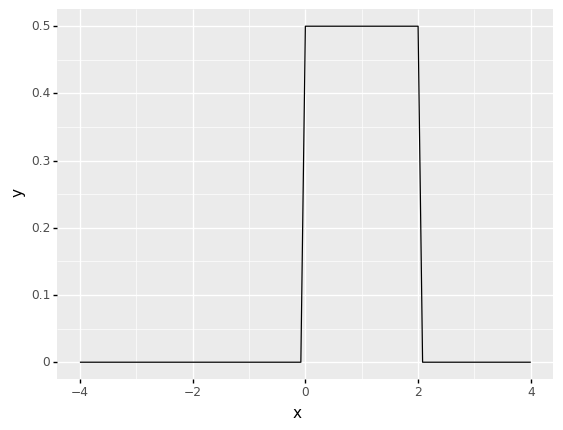

<ggplot: (310012209)>

In [30]:
# https://stackoverflow.com/questions/48349713/how-to-graph-a-function-in-python-using-plotnine-library
# https://t-redactyl.io/blog/2019/10/making-beautiful-plots-in-python-plus-a-shameless-book-plug.html
a = 0
b = 2

(ggplot(pd.DataFrame(data={"x": [-4, 4]}), aes(x="x"))
    + stat_function(fun=lambda x:  uniform.pdf(x, loc = a, scale = b-a)))

#### Uniform random variate

In probability and statistics, a **random variate** is a particular outcome of a random variable: the random variates which are other outcomes of the same random variable might have different values (random numbers).

The `uniform.rvs` function, with its `loc` and `scale` arguments, creates a uniform continuous variable between the provided intervals. 

In the standard form, the distribution is uniform on [0, 1]. Using the parameters loc and scale, one obtains the uniform distribution on [loc, loc + scale].

The `size` arguments specify how many random variates there are. Include a random state argument with a number if you wish to keep things consistent.

In [31]:
# random numbers from uniform distribution
n = 1000
start = 1
width = 2

data_uniform = pd.DataFrame({'x':uniform.rvs(size=n, loc = start, scale=width)})

To visualize the histogram of the distribution you just built together with the kernel density estimate, use plotnine as follows:

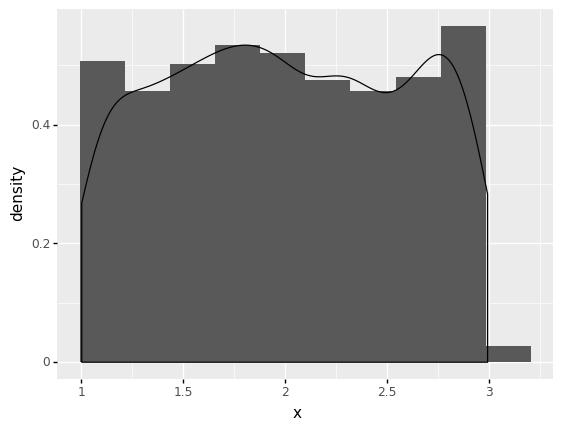

<ggplot: (278390077)>

In [32]:
(
    ggplot(data_uniform) +  # What data to use
    aes('x') +  # What variable to use
    geom_histogram(aes(y=after_stat('density')), bins = 10) + # Geometric object to use for drawing
    geom_density(aes(y=after_stat('density'))) 
)

### Normal Distribution Function

In Data Science, the **Normal Distribution**, commonly known as the **Gaussian Distribution**, is often used, especially when it comes to statistical inference. Many data science techniques make this assumption as well.

The mean $\mu$ and standard deviation $\sigma$ of a normal distribution define a bell-shaped density curve. The density curve is symmetrical, centered around its mean, and its spread is determined by its standard deviation, indicating that data close to the mean occur more frequently than those further from it. 

At a given point $x$, the probability distribution function of a normal density curve with mean $\mu$ and standard deviation $\sigma$ is:
$${\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$$

In [33]:
# df = pd.DataFrame({'x':np.linspace(-10.0,10.0,200)})
# df = df.assign(y = norm.pdf(df.x))

The following code plots the density of the normal distribution where the location (`loc`) keyword specifies the mean. The scale (`scale`) keyword specifies the standard deviation

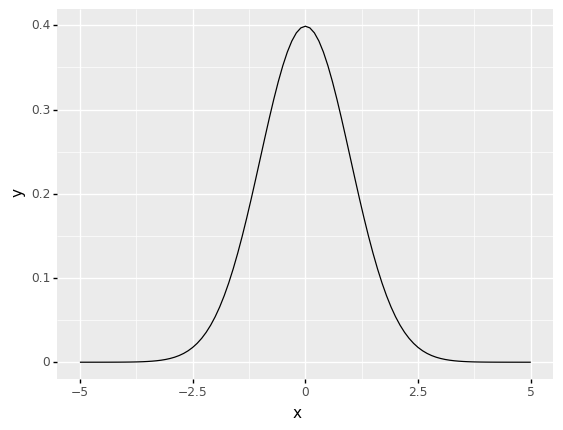

<ggplot: (311062993)>

In [34]:
mu = 0
sd = 1

(ggplot(pd.DataFrame(data={"x": [-5, 5]}), aes(x="x"))
    + stat_function(fun=lambda x:  norm.pdf(x, loc = mu, scale = sd)))

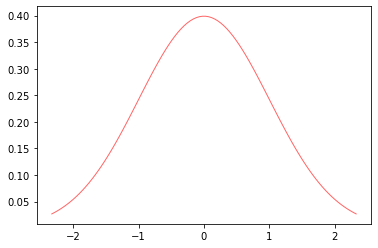

In [35]:
from scipy.stats import *
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=1, alpha=0.6, label='norm pdf')

Exercise:

1. What percent of data falls within 1 standard deviation above the mean?

2. What percent of data falls within 2 standard deviation above the mean?

Hint: use `norm.cdf(x, loc, scale)` cumulative distribution function.

Exercise:

1. Generate $n = 10000$ random numbers from standard normal distribution.

2. Plot the histogram of those $n$ random numbers and superimpose the kernel density estimate of the histogram.

In [36]:
# random numbers from normal distribution
n = 1000
mu = 0
sd = 1

data_norm = pd.DataFrame({'x':norm.rvs(size=n, loc = mu, scale=sd)})

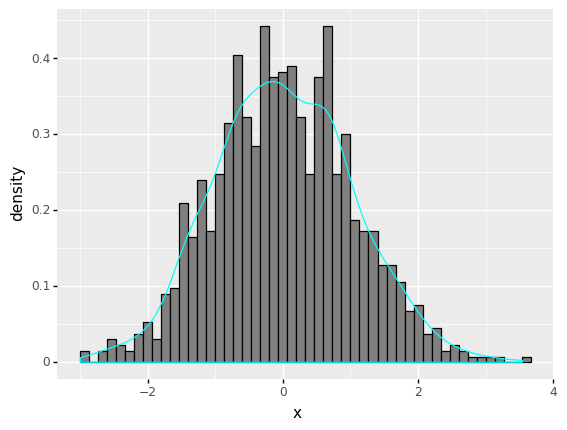

<ggplot: (311126465)>

In [37]:
(
    ggplot(data_norm) +  # What data to use
    aes('x') +  # What variable to use
    geom_histogram(aes(y=after_stat('density')), bins = 50, fill ='gray', colour ='black') + # Geometric object to use for drawing
    geom_density(aes(y=after_stat('density')),colour ='cyan') 
)

### Poisson Distribution

Typically, a Poisson random variable is used to model the number of times an event occurs in a certain time frame. A Poisson process, for example, might be considered as the number of users who visit a website at a certain interval. 

The rate ($\mu$) at which events occur is given by the Poisson distribution. In a certain interval, an event can occur 0, 1, 2,... times. 

The average number of events in an interval is designated $λ$ (lambda). The event rate, commonly known as the rate parameter, is $\lambda$. 

The following equation gives the likelihood of seeing $k$ events in a given interval:
$$\!f(k; \lambda)= \Pr(X{=}k)= \frac{\lambda^k e^{-\lambda}}{k!},$$

#### Poisson Distribution Function
It is worth noting that 

1. the normal distribution is a special case of the Poisson distribution with parameter $\lambda \rightarrow \infty$. 

2. In addition, if the intervals between random events follow an exponential distribution with rate $\lambda$, then the total number of occurrences in a time period of length $t$ follows the Poisson distribution with parameter $\lambda t$.

Exercise:

1. Generate $n = 1000$ random numbers from a Poisson  distribution with rates $\lambda = 1$ and $\lambda  = 4$.

2. Plot the histogram of those $n$ random numbers.

3. Create the frequency distribution of the random numbers generated and compare with those numbers (frequencies) obtained from the Poisson distribution with the specified parameter values.

Before attempting to answer questions, we first plot the pmf of a Poisson distribution.

The following python codes plot the pmf of a Poisson distribution using matplotlib and plotnine.

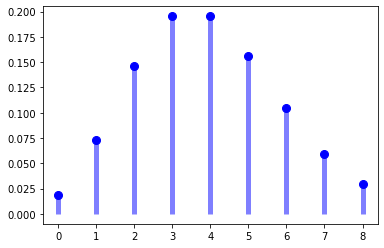

In [38]:
fig, ax = plt.subplots(1, 1)

mu = 4

x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

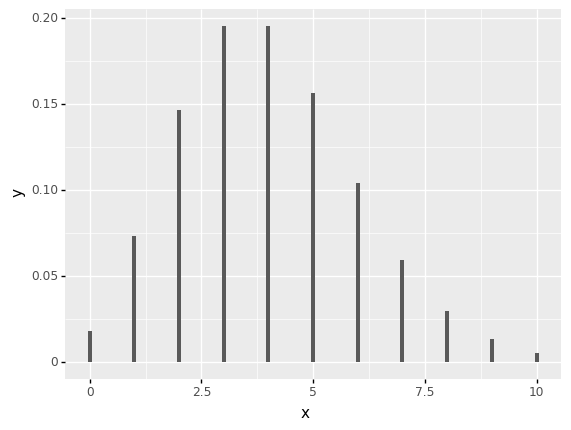

<ggplot: (311160229)>

In [39]:
mu = 4

(ggplot(pd.DataFrame(data={"x": [0,10]}), aes(x="x"))
    + stat_function(geom='bar', fun=lambda x:  poisson.pmf(x, mu)))

1. Generate $n = 1000$ random numbers from a Poisson  distribution with rates $\lambda = 1$ and $\lambda  = 4$.

Ans: We use `poisson.rvs` to generate $n$ random number from the Poisson distributin with $\lambda  = 4$.

In [68]:
# random numbers from Poisson distribution

n = 1000
mu = 4

data_poisson = pd.DataFrame({'x':poisson.rvs(mu, size=n, random_state=888)})

By the method of moments, we can obtain the parameter of the Poisson distribution by matching 

Model : X ~ Poisson(lambda)


E[X] = lambda = X_bar = sample mean

The estimate of lambda (lambda~ = sample mean)

In [69]:
lambda_est = data_poisson['x'].mean()

print(lambda_est)

4.033


2. Plot the histogram of those $n$ random numbers.

Ans: The histogram can be obtained as follows:

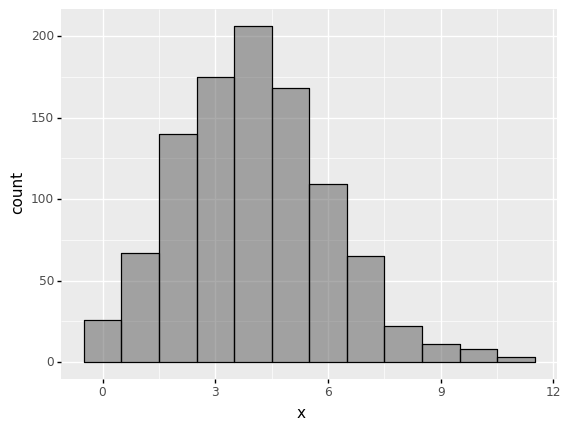

<ggplot: (279189929)>

In [70]:
(
    ggplot(data_poisson) + 
    aes('x') + 
    geom_histogram(aes(y=after_stat('count')), binwidth=1,color='black',alpha=0.5 )
)

3. Create the frequency distribution of the random numbers generated and compare with those numbers (frequencies) obtained from the Poisson distribution with the specified parameter values.

Ans: We can simply create a frequency table using `value_counts`. Note that we also specify `sort=False`.

In [71]:
data_poisson.value_counts(sort = False)

x 
0      26
1      67
2     140
3     175
4     206
5     168
6     109
7      65
8      22
9      11
10      8
11      3
dtype: int64

Alternatively, we can also create the frequency table using `groupby` method.

In [72]:
data_poisson['simulation']= data_poisson['x']
#data_poisson['freq']= data_poisson['x']
data_poisson.groupby('x').count()

,simulation
x,
0,26
1,67
2,140
3,175
4,206
5,168
6,109
7,65
8,22


With the specified value of $n$ (the number of simulated random numbers), we calculate the expected numbers from the Poisson distribution and add them into a new column called **poisson**. 

The results also show that the distribution of the simulated random numbers comes from the Poisson distribution. How do we  confirm our findings?

In [73]:
output_freq = data_poisson.groupby('x').count()
output_freq['x'] = output_freq.index
output_freq.sort_index(axis=1,ascending=False,inplace=True)
output_freq['poisson'] =  n*poisson.pmf(output_freq['x'],mu)
output_freq

,x,simulation,poisson
x,,,
0,0,26,18.315639
1,1,67,73.262556
2,2,140,146.525111
3,3,175,195.366815
4,4,206,195.366815
5,5,168,156.293452
6,6,109,104.195635
7,7,65,59.540363
8,8,22,29.770181


In [74]:
#pd.melt(output_freq, id_vars = 'x', value_vars=['freq','poisson'], value_name='values')
pd.melt(output_freq, id_vars = 'x', value_vars=['simulation','poisson'], value_name='values')

,x,variable,values
0,0,simulation,26.000000
1,1,simulation,67.000000
2,2,simulation,140.000000
3,3,simulation,175.000000
4,4,simulation,206.000000
5,5,simulation,168.000000
6,6,simulation,109.000000
7,7,simulation,65.000000
8,8,simulation,22.000000
9,9,simulation,11.000000


To compare the plots of frequency plots (bar plots) side by side (from two variables **simulation** and **poisson** of our data frame, we need to **reshape** our data frame into a more computer-friendly form using Pandas in Python.

To achieve this, `pandas.melt()` unpivots a DataFrame from wide format to long format.

`melt()` function is useful to reshape a DataFrame into a format where one or more columns are identifier variables, while all other columns, considered measured variables, are unpivoted to the row axis, leaving just two non-identifier columns, variable and value. 

See https://stackoverflow.com/questions/42820677/ggplot-bar-plot-side-by-side-using-two-variables

https://www.geeksforgeeks.org/python-pandas-melt/ for more detail.

     x    variable      values
0    0  simulation   26.000000
1    1  simulation   67.000000
2    2  simulation  140.000000
3    3  simulation  175.000000
4    4  simulation  206.000000
5    5  simulation  168.000000
6    6  simulation  109.000000
7    7  simulation   65.000000
8    8  simulation   22.000000
9    9  simulation   11.000000
10  10  simulation    8.000000
11  11  simulation    3.000000
12   0     poisson   18.315639
13   1     poisson   73.262556
14   2     poisson  146.525111
15   3     poisson  195.366815
16   4     poisson  195.366815
17   5     poisson  156.293452
18   6     poisson  104.195635
19   7     poisson   59.540363
20   8     poisson   29.770181
21   9     poisson   13.231192
22  10     poisson    5.292477
23  11     poisson    1.924537


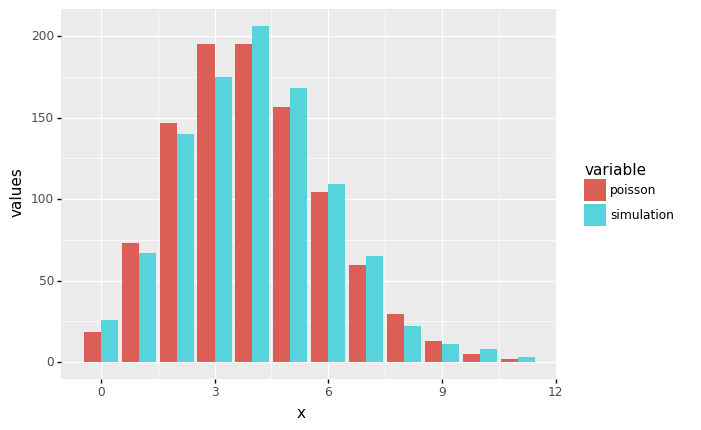

<ggplot: (312077221)>

In [75]:
# https://stackoverflow.com/questions/42820677/ggplot-bar-plot-side-by-side-using-two-variables
# https://www.geeksforgeeks.org/python-pandas-melt/

output_freq_melted = pd.melt(output_freq, id_vars = 'x', value_vars=['simulation','poisson'], value_name='values')

print(output_freq_melted)

(
    ggplot(output_freq_melted, aes(x='x', y='values', fill='variable')) +
    geom_bar(stat='identity', position='dodge')
) 

## Fitting Models to Data 

We will learn how to find the best-matching statistical distributions for your data points. Modeling quantities of interest for example claim numbers and sizes is the subject of this section, which involves fitting probability distributions from selected families to sets of data containing observed claim numbers or sizes. 

After an exploratory investigation of the data set, the family may be chosen by looking at numerical summaries such as mean, median, mode, standard deviation (or variance), skewness, kurtosis, and graphs like the empirical distribution function. 

Of course, one might want to fit a distribution from each of several families to compare the fitted models, as well as compare them to earlier work and make a decision.

In statistics, **probability distributions** are a fundamental concept. They are employed in both theoretical and practical settings.

The following are some examples of probability distributions in use:

* It is frequently used in the case of univariate data to determine an appropriate distributional model for the data.

* Specific distributional assumptions are frequently used in statistical intervals and hypothesis tests.

* Calculate parameter confidence intervals as well as critical regions for hypothesis testing.

* Continuous probability distributions are frequently employed in machine learning models, particularly in the distribution of numerical input and output variables, as well as the distribution of model errors.

To fit a **parametric model** (i.e. a probability distribution), we must obtain estimates of the probability distribution's unknown parameters. The method of moments, the method of maximum likelihood, the method of percentiles, and the method of minimum distance are among the criteria offered.

#### Generate test data and fit it

For the first illustration, we will begin by generating some normally distributed test data using the **NumPy** module and fit them by using the **Fitter** library to see whether the fitter is able to identify the distribution.

The **Fitter** package offers a basic class that can be used to identify the distribution from which a data sample is drawn. It employs 80 Scipy distributions and allows you to plot the results to see which distribution is the most likely and which parameters are the best.

In [100]:
# Set random seed and generate test data
np.random.seed(88)
data = np.random.normal(loc=5, scale=10, size=2000, )
data = pd.DataFrame({'x':data})

# Alternatively, we can run
# data_norm = pd.DataFrame({'x':norm.rvs(size=n, loc = mu, scale=sd)})

In [101]:
data.head()

,x
0,6.068843
1,27.058152
2,14.565627
3,5.684111
4,15.685138


We can use the plotnine to plot the histogram. The number of bins provided here is 20. The plot shows that the data overall follows a normal distribution.

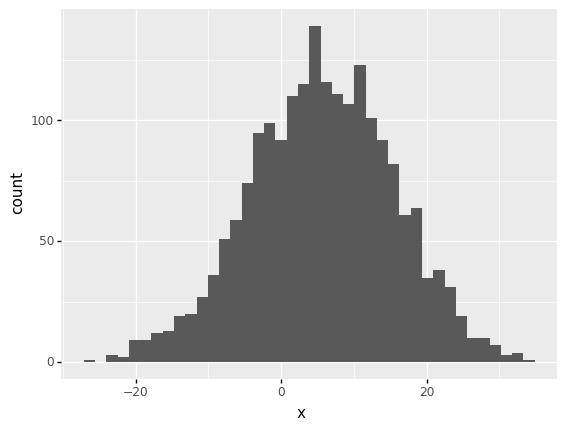

<ggplot: (313611497)>

In [102]:
ggplot(data) + aes('x') + geom_histogram(bins = 40)

#### Fitting distributions

The next step is to start fitting different distributions to the data and determining which one is best for the data.

The steps are as follows:

1. Call the Fitter method to create a Fitter instance.

2. If you have a basic idea of the distributions that might fit your data, provide the data and distributions list.

3. Use the `.fit()` method.

4. Using the `.summary()` method, create a summary of the fitted distribution.

**Note:** If you have no idea what distribution might fit your data at first, you can run Fitter() and merely provide the data.

The Fitter class in the backend uses the **Scipy** library, which supports 80 different distributions. The **Fitter** class will scan all of them, call the fit function for you, ignore any that fail or run forever, and then provide you a summary of the best distributions in terms of sum of square errors.

However, because it will try so many different distributions, this may take some time, and the fitting time varies depending on the size of your sample. As a result, it is recommended that you display a histogram to have a general idea of the types of distributions that might match the data and supply those distribution names in a list. This will save you a lot of time.

**Fitter** library utilizes SciPy's fit method to extract the parameters of a distribution that best fit the data given a data sample. This process is repeated for all available distributions. Finally, we present a summary so that the quality of the fit for those distributions may be determined.

In [103]:
# pip install fitter

In [104]:
# Required libraries

from fitter import Fitter, get_common_distributions, get_distributions

Here we speficy a list of possible undelying distribution that could have generated a data set including gamma, lognormal, beta and normal distributions. 

However, the distribution's parameters are unknown, thus there are numerous distributions. As a result, an automated method of fitting multiple distributions to the data would be beneficial.

,sumsquare_error,aic,bic,kl_div
norm,0.001267,960.095049,-28528.628648,inf
lognorm,0.001281,964.877953,-28499.085772,inf
gamma,0.001310,964.163478,-28453.859526,inf


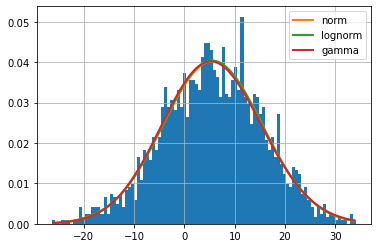

In [105]:
f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "norm"])
f.fit()
f.summary()

#### Choosing the most appropriate distribution and indentifying the parameters

We may also use the `.get_best()` method to retrieve the best distribution, where we can additionally specify the technique for picking the best distribution. 

As selection criteria, we can use the `sumsquare_error` in the method argument. It will print the name of the distribution with the lowest sum square error, as well as the relevant parameters. 'sumsquare_error' is a formula used to measure the difference between the given data and the expected data obtained by the fitted model, i.e. **lower is better**. 

Based on the sum square error criteria, we can observe that the normal distribution is the best fit. It also prints the normal distribution's optimum parameters including location (loc), and scale parameters (scale).

Note that sum of the square errors between the data $Y_i$ and the fitted distribution $pdf(X_i)$ is defined by $$\sum_i \left( Y_i - pdf(X_i) \right)^2.$$
(see https://fitter.readthedocs.io/en/latest/references.html?highlight=sum%20square#fitter.fitter.Fitter.fit)

Alternative to the square errors, we can also test the goodness of fit using the **Kolmogorov–Smirnov test** after fitting a probability distribution to our data. The Kolmogorov–Smirnov test is a widely used option.   The test essentially provides you with a statistic and a p-value, which you must interpret using a K-S test table. 

See https://medium.com/@amirarsalan.rajabi/distribution-fitting-with-python-scipy-bb70a42c0aed for more detail.

For details about relative fit measures and goodness of fit see https://vortarus.com/assessing-distribution-fit/

In [106]:
f.get_best(method = 'sumsquare_error')

{'norm': {'loc': 5.630744055249008, 'scale': 9.899359274217787}}

In addition, we can also print the fitted parameters using the fitted_param attribute and indexing it out using the distribution name for example 'gamma'.

In [107]:
f.fitted_param['norm']

(5.630744055249008, 9.899359274217787)

In [108]:
f.fitted_param['lognorm']

(0.010345149115340332, -948.2039689041416, 953.8081165452257)

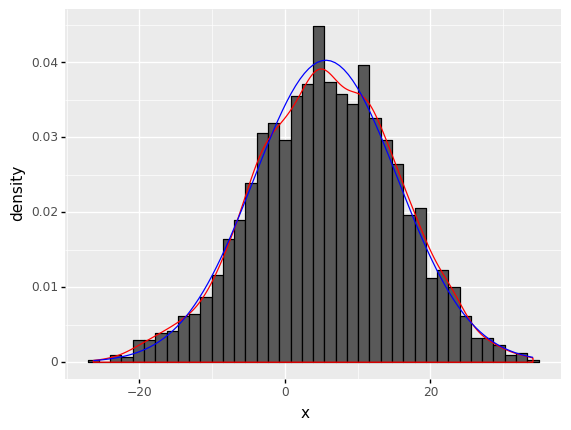

<ggplot: (313770689)>

In [109]:
(
    ggplot(data) +  # What data to use
    aes('x') +  # What variable to use
    geom_histogram(aes(y=after_stat('density')), bins = 40,color='black') + # Geometric object to use for drawing
    geom_density(aes(y=after_stat('density')),color='red') +
    stat_function(fun=lambda x:  norm.pdf(x, loc = f.fitted_param['norm'][0], scale = f.fitted_param['norm'][1]),color='blue') 
)

In [110]:
# data2.drop('fitted',axis=1,inplace=True)

In [111]:
# Aim: add type so that legend will be created

data2 = data
data2['type'] = 'x'
data2['fitted'] = norm.pdf(data2['x'], loc = f.fitted_param['norm'][0], scale = f.fitted_param['norm'][1]  )

In [112]:
#data2.drop('type',axis=1,inplace=True)

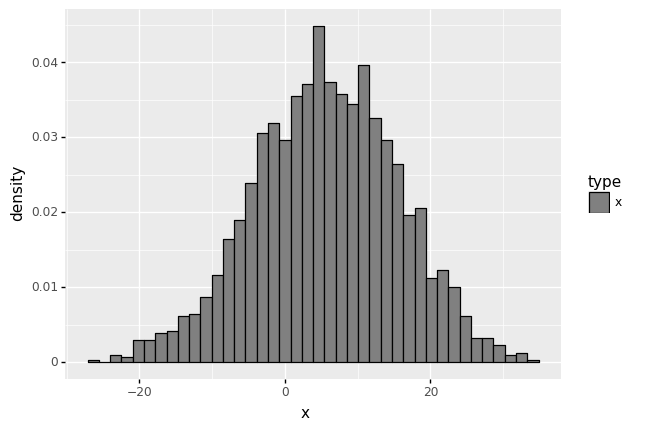

<ggplot: (313762393)>

In [113]:
# (ggplot(data2) + aes(x = 'x', y = 'fitted',color='type') + geom_line() + geom_histogram(aes(y=after_stat('density'))  ))

(
    ggplot(data2) +  # What data to use
    aes(x='x',color='type') +  # What variable to use
    geom_histogram(aes(y=after_stat('density')),fill='gray',bins=40  ) +
    scale_color_manual(values = ['black'])
)

**Note** alternative to Fitter library, we can also use **Distfit** Python library to automatically fit distributions to data.

See the following links for more details:

https://erdogant.github.io/distfit/pages/html/index.html

https://towardsdatascience.com/find-the-best-matching-distribution-for-your-data-effortlessly-bcc091aa08ab

### Distribution fitting with distfit

The distfit library uses the goodness of fit test with the Sum of Squared Errors (or estimates) (SSE) to determine the best probability distribution. 

The Sum of Squared Errors (or estimates) (SSE), also named Residual Sum of Squares (RSS) works by comparing the observed frequency (f) to the expected frequency from the model (f-hat), and computing the residual sum of squares (RSS). 

In [114]:
# Load library
from distfit import distfit
# Initialize model and test only for normal distribution
#dist = distfit(distr='norm')
# Set multiple distributions to test for
# see for bin size and smoothing https://erdogant.github.io/distfit/pages/html/Performance.html#probability-density-function-fitting
dist = distfit(distr=['norm','lognorm'],bins=100)

# Search for best theoretical fit on your empirical data
results = dist.fit_transform(data.x)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm   ] [0.00 sec] [RSS: 0.0012671] [loc=5.631 scale=9.899]
[distfit] >[lognorm] [0.28 sec] [RSS: 0.0012811] [loc=-948.204 scale=953.808]
[distfit] >Compute confidence interval [parametric]


[distfit] >plot..
[distfit] >plot summary..
     distr     score  LLE         loc       scale                      arg
0     norm  0.001267  NaN    5.630744    9.899359                       ()
1  lognorm  0.001281  NaN -948.203969  953.808117  (0.010345149115340332,)


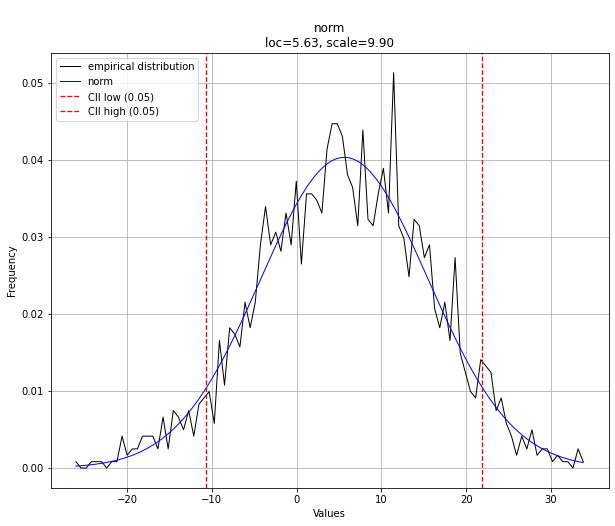

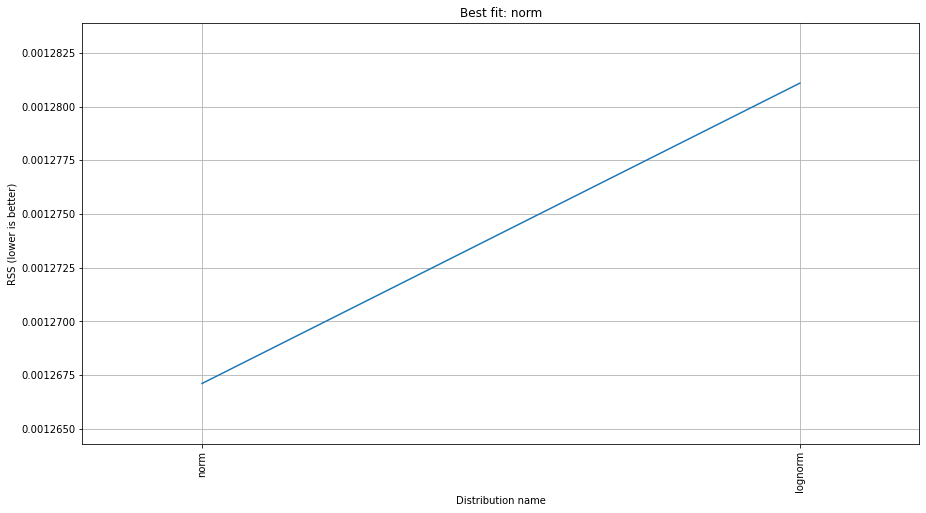

In [115]:
dist.plot()

# Make plot
dist.plot_summary()

print(dist.summary)


### Distribution Fitting with Python SciPy

In [116]:
from scipy import stats

In [117]:
data

dist = getattr(stats, 'norm')
parameters = dist.fit(data['x'])
print(parameters)

(5.630744055249008, 9.899359274217787)


In [118]:
#dist = getattr(stats, 'lognorm')
#parameters = dist.fit(data['x'])
#print(parameters)

#### Calculating the sum of squared errors

In [119]:
data

,x,type,fitted
0,6.068843,x,0.040260
1,27.058152,x,0.003872
2,14.565627,x,0.026817
3,5.684111,x,0.040299
4,15.685138,x,0.024060
...,...,...,...
1995,10.669909,x,0.035403
1996,17.114355,x,0.020563
1997,8.697924,x,0.038411
1998,5.497944,x,0.040296


In [124]:
# Get histogram of original data
#y, x = np.histogram(data, bins=100, density=True)
y, x = np.histogram(data.x, bins=100, density=True)
x_mid = (x + np.roll(x, -1))[:-1] / 2.0  # go from bin edges to bin middles

In [125]:
#(ggplot(pd.DataFrame(data={"x": x, "y":y}), aes(x="x",y="y"))
#    + geom_col())

In [126]:
parameters[1]

9.899359274217787

In [127]:
# Calculate fitted PDF and error with fit in distribution
pdf = norm.pdf(x_mid, loc=parameters[0], scale=parameters[1])

# To go from pdf back to counts need to un-normalise the pdf
# See Fitting All of Scipy's Distributions: https://nedyoxall.github.io/fitting_all_of_scipys_distributions.html
# pdf_scaled = pdf * bin_width * N # to go from pdf back to counts need to un-normalise the pdf

sse = np.sum(np.power(y - pdf, 2.0))

print(sse)

0.0012671148087710314


#### Get data points from a histogram in Python from matplotlib

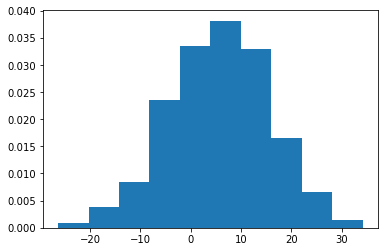

In [129]:
#counts, bins, bars = plt.hist(data, density=True,bins=10)
counts, bins, bars = plt.hist(data.x, density=True,bins=10)

In [130]:
bins

array([-26.34134829, -20.29646977, -14.25159126,  -8.20671274,
        -2.16183422,   3.88304429,   9.92792281,  15.97280133,
        22.01767984,  28.06255836,  34.10743688])

In [131]:
# Get histogram of original data
y, x = np.histogram(data.x, bins=40, density=True)
x_mid = (x + np.roll(x, -1))[:-1] / 2.0 # go from bin edges to bin middles

In [132]:
# Aim: plot histogram of original data (from y and x obtained abov) 
# and plot the fitted values

df_freq = pd.DataFrame({'x':x_mid, 'data':y })

df_freq['fitted'] = norm.pdf(df_freq.x, loc = f.fitted_param['norm'][0], scale = f.fitted_param['norm'][1])

df_freq.head()

,x,data,fitted
0,-25.585738,0.000331,0.000279
1,-24.074519,0.000662,0.000447
2,-22.563299,0.000662,0.000698
3,-21.052080,0.001985,0.001066
4,-19.540860,0.002316,0.001590


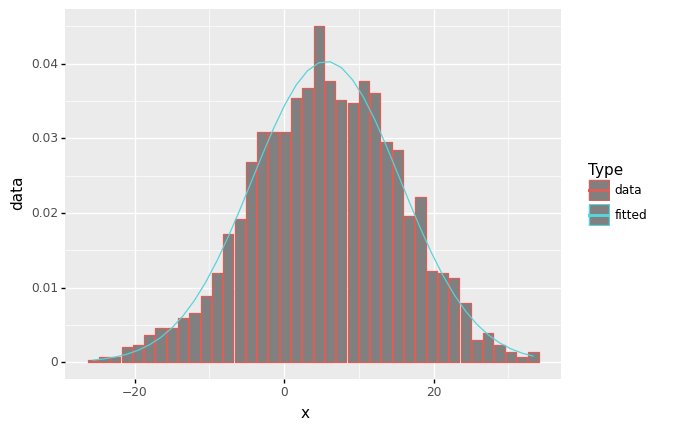

<ggplot: (313112281)>

In [133]:
(ggplot(df_freq, aes('x')) + 
     geom_col(aes(y= 'data',color='"data"'),fill='grey') +
     geom_line(aes(y='fitted',color='"fitted"')) +
     scale_color_manual(values = ['black','blue']) +
     scale_color_discrete(name = "Type")
)

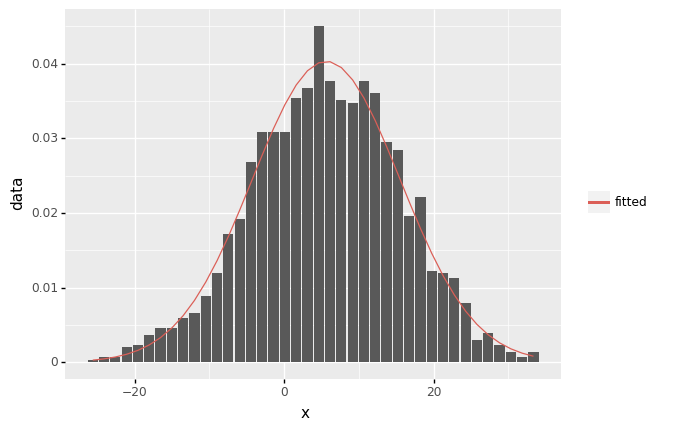

<ggplot: (313105013)>

In [134]:
(ggplot(df_freq, aes('x')) + 
     geom_col(aes(y='data')) +
     geom_line(aes(y='fitted',color='"fitted"')) +
     scale_color_discrete(name = " ")
)

In [135]:
df_freq_melted = pd.melt(df_freq, id_vars = 'x', value_vars=['data','fitted'], var_name='type')

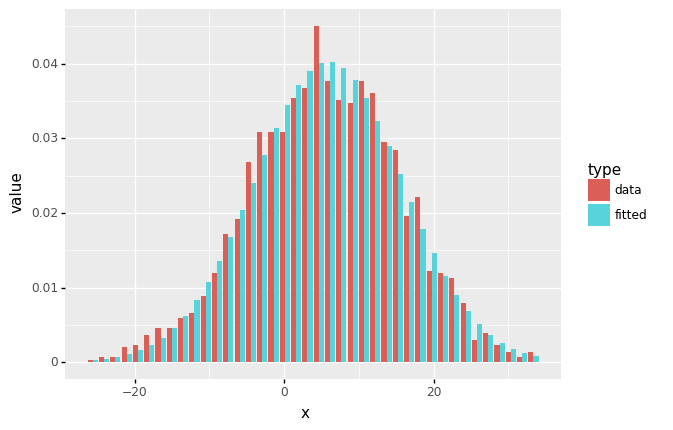

<ggplot: (314094577)>

In [136]:
# https://rpubs.com/Mentors_Ubiqum/geom_col_1

(
    ggplot(df_freq_melted) +
    geom_col(aes('x','value',fill='type'), position='dodge')
)

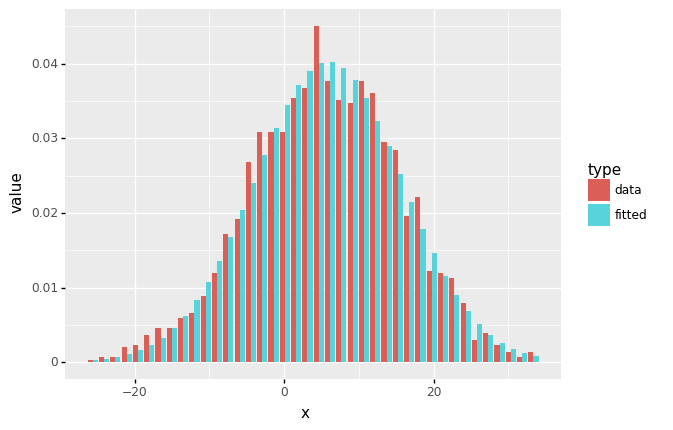

<ggplot: (313475537)>

In [137]:

(
    ggplot(df_freq_melted) + 
    aes('x','value',fill='type') + geom_bar(stat='identity',position='dodge')
)

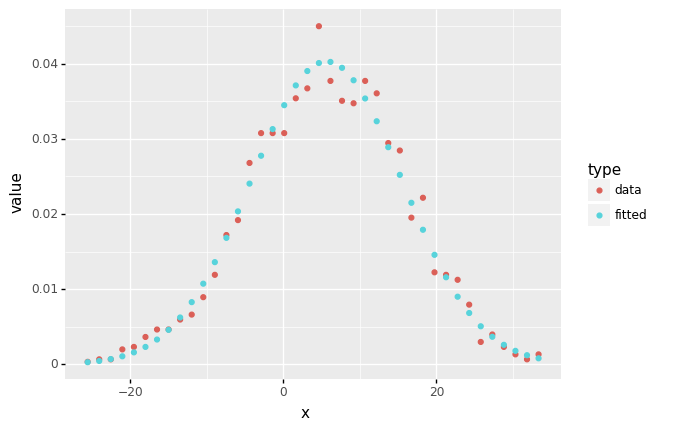

<ggplot: (313466893)>

In [138]:
df_freq_melted = pd.melt(df_freq, id_vars = 'x', value_vars=['data','fitted'], var_name='type')


(ggplot(df_freq_melted) + 
     aes('x','value',color='type') + geom_point()
)